In [1]:
import seaborn as sns
data=sns.load_dataset('iris')

In [2]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

In [4]:
x=data.iloc[:,[2,3]]

In [5]:
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


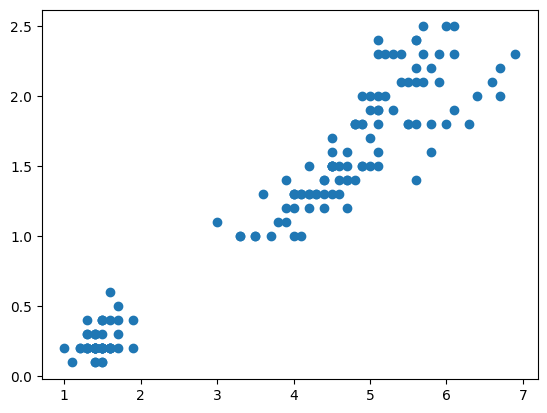

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x['petal_length'],x['petal_width'])

In [7]:
import scipy.cluster.hierarchy as sch

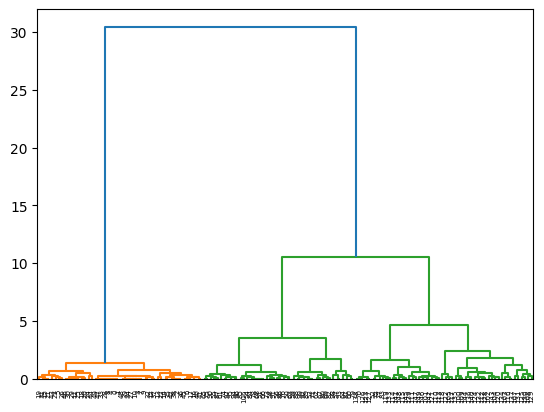

In [8]:
dg=sch.dendrogram(sch.linkage(x,method='ward'))

In [9]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
pred=Ag.fit_predict(x)

In [10]:
data['cluster']=pred

In [11]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


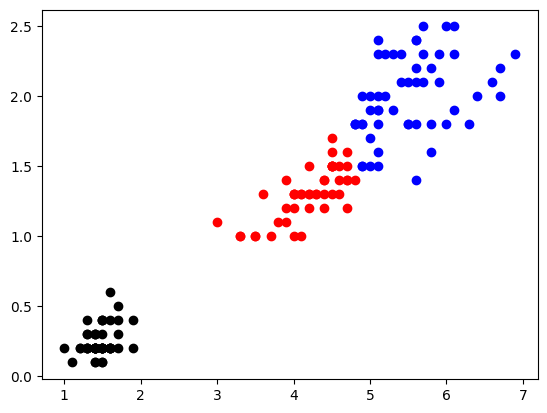

In [12]:
data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]
plt.scatter(data0['petal_length'],data0['petal_width'],color='b')
plt.scatter(data1['petal_length'],data1['petal_width'],color='k')
plt.scatter(data2['petal_length'],data2['petal_width'],color='r')

In [13]:
import pandas as pd
dat=pd.read_csv('Mall_Customers.csv')

In [14]:
dat.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
XX=dat.iloc[:,[3,4]]

In [71]:
from sklearn.cluster import DBSCAN
from itertools import product
import numpy as np

In [72]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(XX)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(XX, DBS_clustering.labels_))

In [75]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

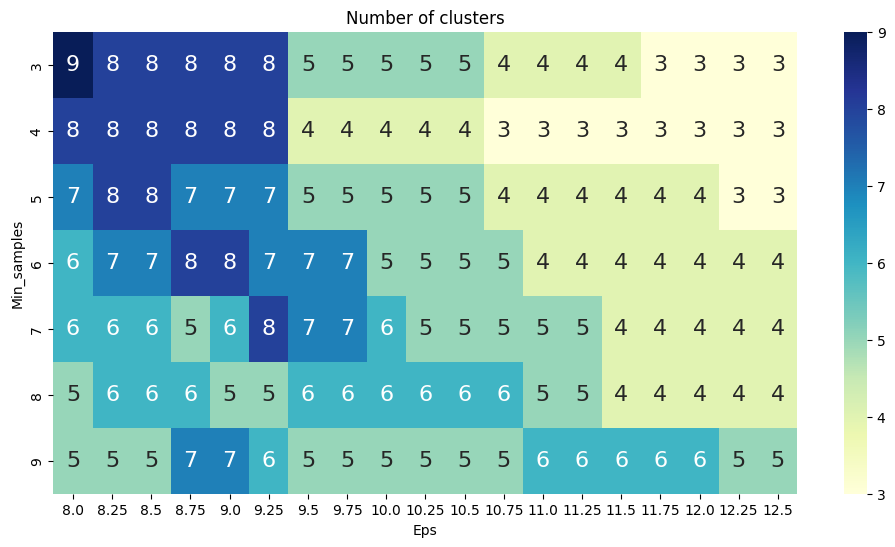

In [76]:
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [77]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

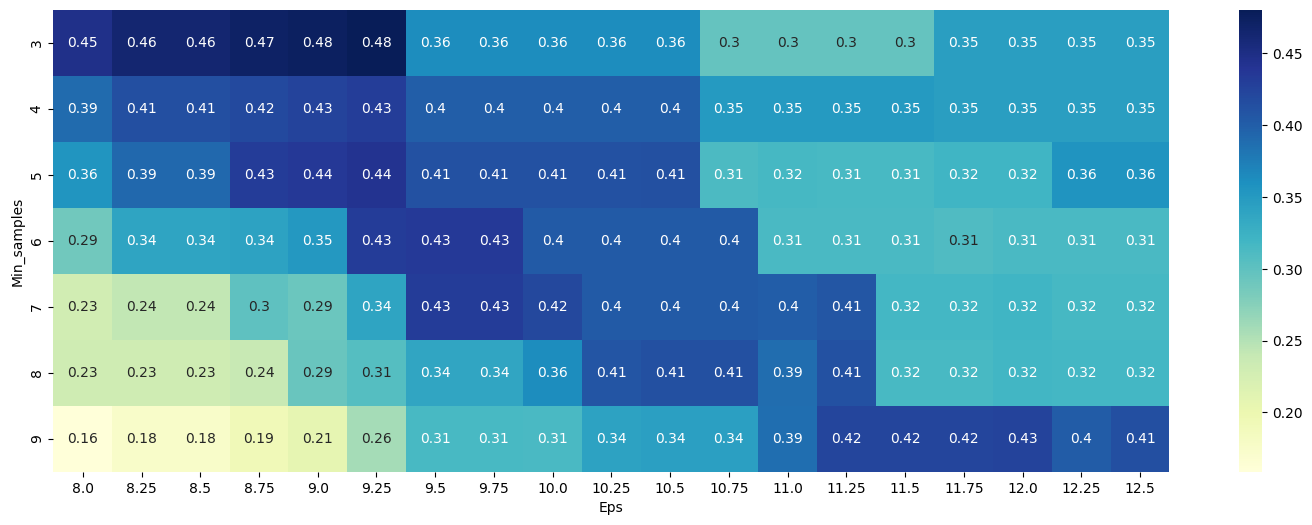

In [78]:
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [79]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(XX)

In [80]:
DBSCAN_clustered = XX.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [81]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,9
0,157
1,34


In [82]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

TypeError: scatterplot() got multiple values for argument 'data'

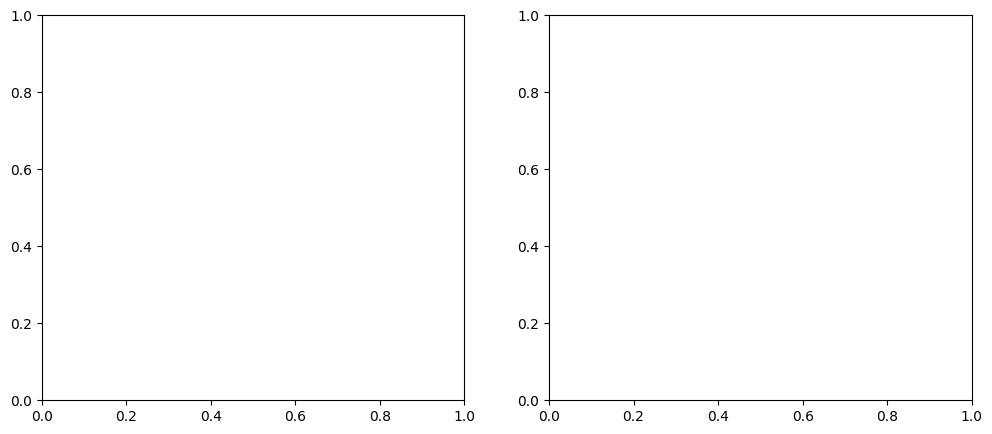

In [84]:
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.show()

ValueError: Could not interpret value `Age` for `x`. An entry with this name does not appear in `data`.

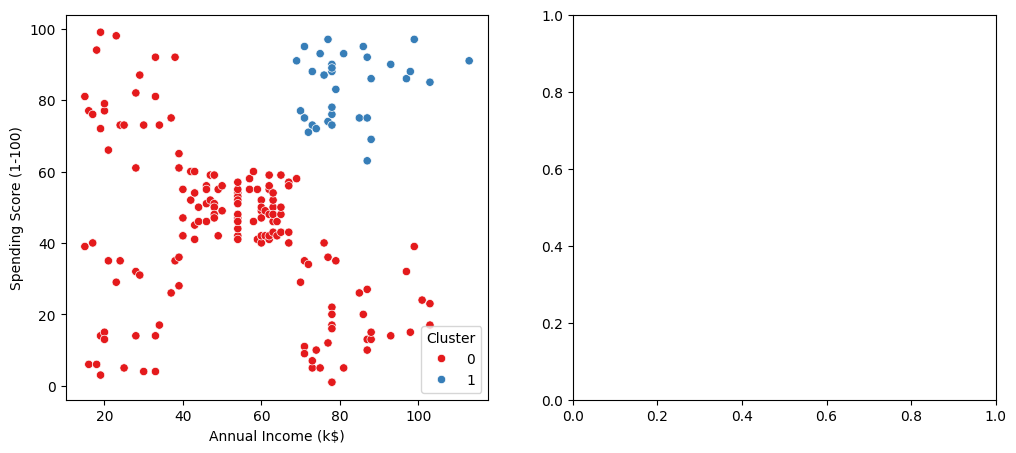

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming DBSCAN_clustered is your DataFrame and 'Cluster' is the column with cluster labels
# and you want to exclude noise points (Cluster != -1)
# Assuming 'outliers' DataFrame contains the points labeled as noise

# Filter out the noise points
filtered_data = DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1]
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for 'Annual Income (k$)' vs 'Spending Score (1-100)'
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    data=filtered_data,
    hue='Cluster', ax=axes[0], palette='Set1', legend='full'
)

# Scatter plot for 'Age' vs 'Spending Score (1-100)'
sns.scatterplot(
    x='Age', y='Spending Score (1-100)',
    data=filtered_data,
    hue='Cluster', palette='Set1', ax=axes[1], legend='full'
)

# Plotting the outliers
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")

# Adding legends and titles
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

# Set titles for subplots
axes[0].set_title('Annual Income vs Spending Score')
axes[1].set_title('Age vs Spending Score')

plt.show()


Index(['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'], dtype='object')


ValueError: Could not interpret value `Age` for `x`. An entry with this name does not appear in `data`.

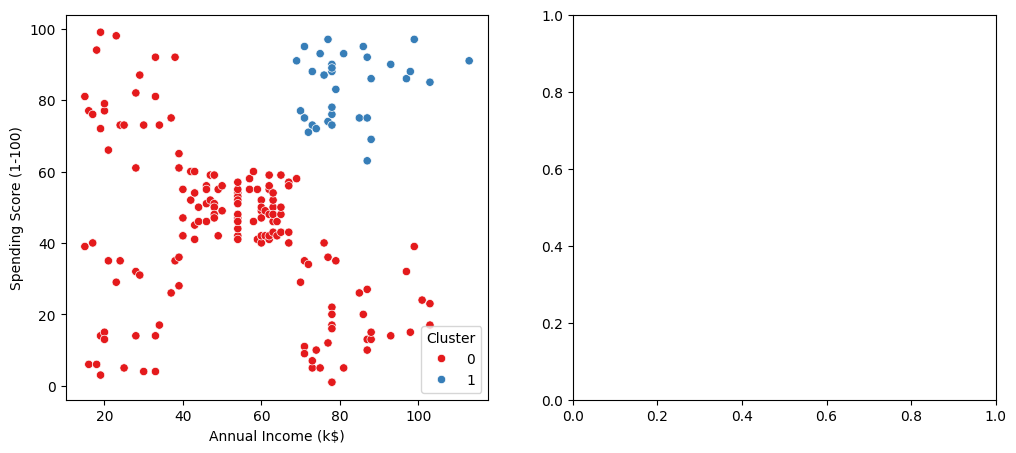

In [86]:
# Check the column names
print(DBSCAN_clustered.columns)

# Assuming the correct column names are used in place of 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for 'Annual Income (k$)' vs 'Spending Score (1-100)'
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
    hue='Cluster', ax=axes[0], palette='Set1', legend='full'
)

# Scatter plot for 'Age' vs 'Spending Score (1-100)'
sns.scatterplot(
    x='Age', y='Spending Score (1-100)',
    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
    hue='Cluster', palette='Set1', ax=axes[1], legend='full'
)

# Plotting the outliers
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")

# Adding legends and titles
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

# Set titles for subplots
axes[0].set_title('Annual Income vs Spending Score')
axes[1].set_title('Age vs Spending Score')

plt.show()


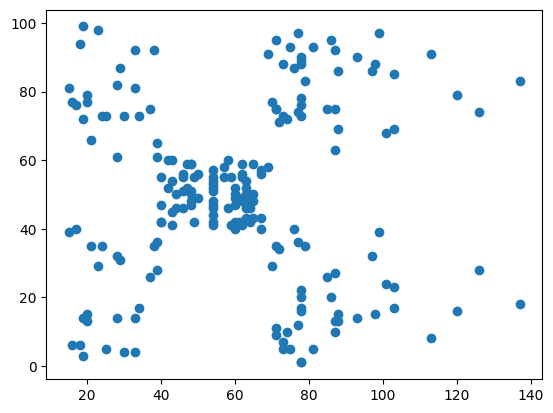

In [16]:
plt.scatter(XX['Annual Income (k$)'],XX['Spending Score (1-100)'])

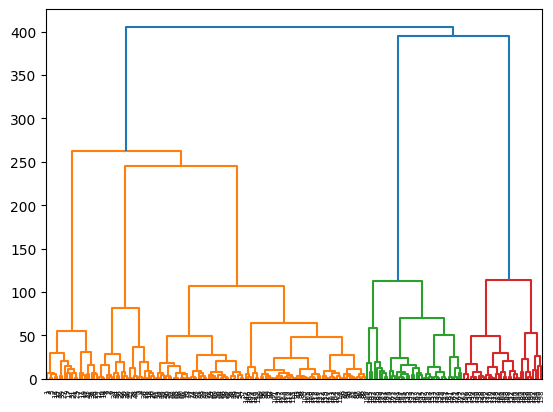

In [17]:
dengr=sch.dendrogram(sch.linkage(XX,method='ward'))

In [18]:
Agclus=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
pred=Agclus.fit_predict(XX)


In [19]:
dat['cluster']=pred

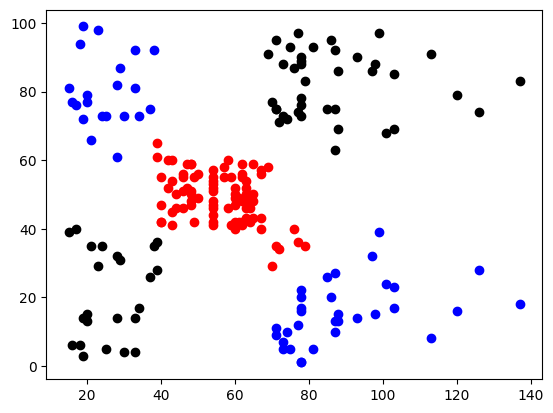

In [20]:
dat0=dat[dat['cluster']==0]
dat1=dat[dat['cluster']==1]
dat2=dat[dat['cluster']==2]
dat3=dat[dat['cluster']==3]
dat4=dat[dat['cluster']==4]
plt.scatter(dat0['Annual Income (k$)'],dat0['Spending Score (1-100)'],color='b')
plt.scatter(dat1['Annual Income (k$)'],dat1['Spending Score (1-100)'],color='r')
plt.scatter(dat2['Annual Income (k$)'],dat2['Spending Score (1-100)'],color='k')
plt.scatter(dat3['Annual Income (k$)'],dat3['Spending Score (1-100)'],color='b')
plt.scatter(dat4['Annual Income (k$)'],dat4['Spending Score (1-100)'],color='k')

In [21]:
df=pd.read_csv('wine-clustering.csv')

In [35]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [54]:
#plt.scatter(df['OD280'],df['Total_Phenols'])
#plt.scatter(df['Proanthocyanins'],df['Total_Phenols'])


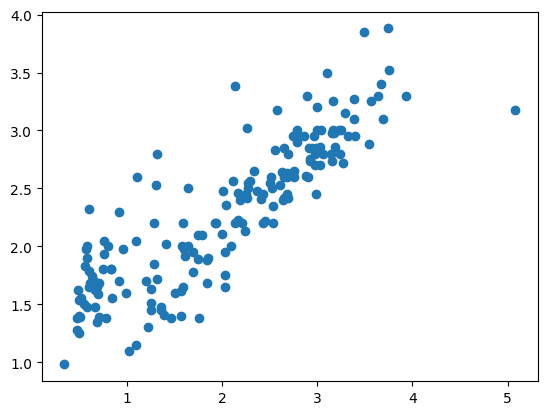

In [50]:
plt.scatter(df['Flavanoids'],df['Total_Phenols'])

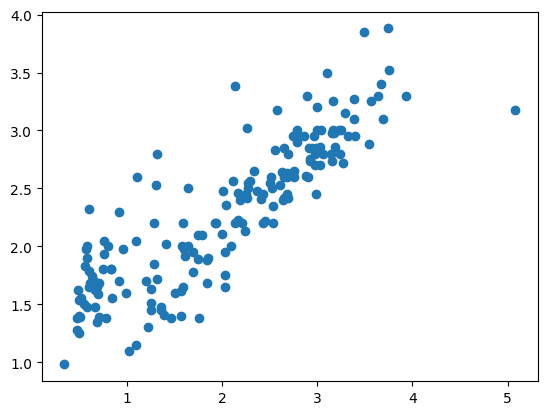

In [53]:
plt.scatter(df['Flavanoids'],df['Total_Phenols'])

In [49]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.428242
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.111545
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.115032
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.319394
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.368196
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.294329
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.229887
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.210822
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.236644
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.244364


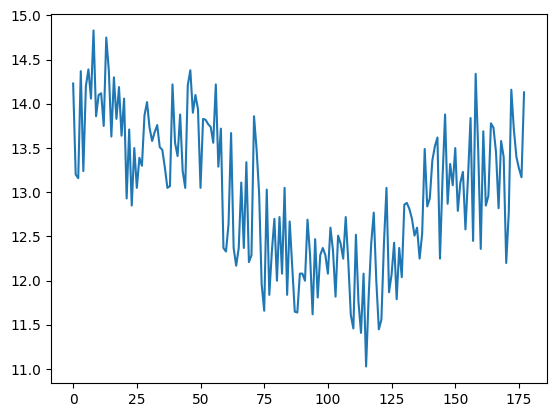

In [23]:
plt.plot(df['Alcohol'])

In [ ]:
sns.pairplot(df)


In [25]:


columns_of_interest = ['Alcohol', 'Malic_Acid', 'Ash', 'Color_Intensity', 'Proline']

# Select these columns from the DataFrame
X = df[columns_of_interest]

In [55]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'cluster'],
      dtype='object')

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  cluster               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


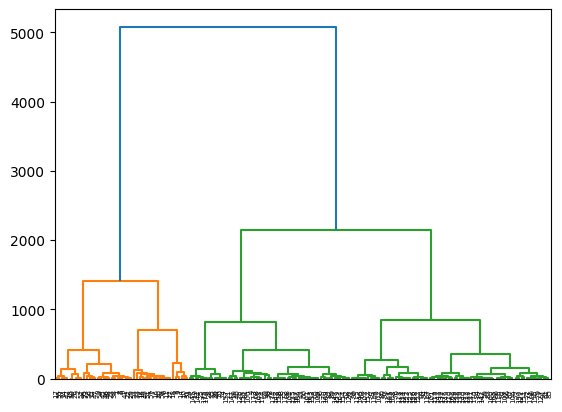

In [59]:
dengr=sch.dendrogram(sch.linkage(df,method='ward'))

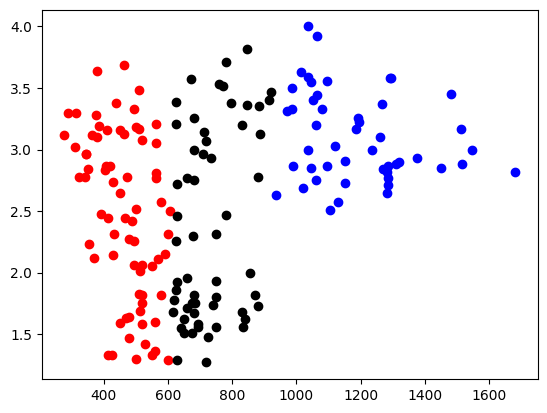

In [63]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
pred=Ag.fit_predict(df)

df['cluster']=pred

df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]


plt.scatter(df0['Proline'],df0['OD280'],color='b')
plt.scatter(df1['Proline'],df1['OD280'],color='r')
plt.scatter(df2['Proline'],df2['OD280'],color='k')



In [34]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'cluster'],
      dtype='object')

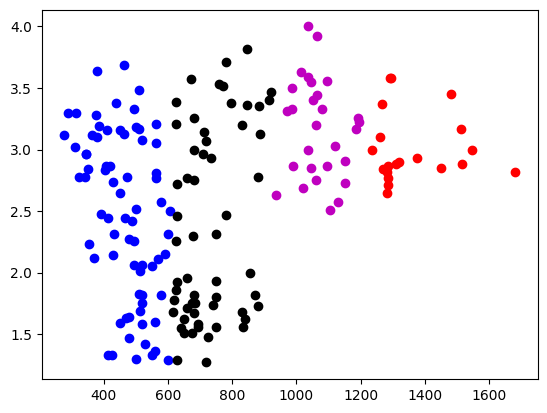

In [64]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
pred=Ag.fit_predict(df)

df['cluster']=pred

df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
df3=df[df['cluster']==3]

plt.scatter(df0['Proline'],df0['OD280'],color='b')
plt.scatter(df1['Proline'],df1['OD280'],color='r')
plt.scatter(df2['Proline'],df2['OD280'],color='k')
plt.scatter(df3['Proline'],df3['OD280'],color='m')


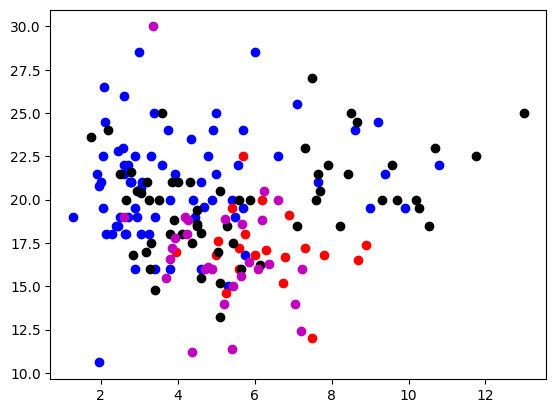

In [66]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
pred=Ag.fit_predict(df)

df['cluster']=pred

df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
df3=df[df['cluster']==3]

plt.scatter(df0['Color_Intensity'],df0['Ash_Alcanity'],color='b')
plt.scatter(df1['Color_Intensity'],df1['Ash_Alcanity'],color='r')
plt.scatter(df2['Color_Intensity'],df2['Ash_Alcanity'],color='k')
plt.scatter(df3['Color_Intensity'],df3['Ash_Alcanity'],color='m')


In [67]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
